In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix

In [2]:
n_samples = 1000
n_outliers = 100
X, Y= make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, bias=0.0, noise=0.0, shuffle=True, coef=False, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

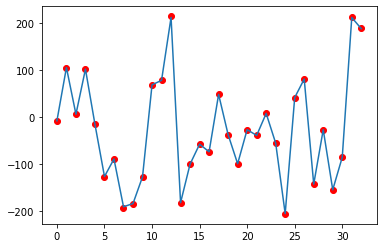

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(random_state=0).fit(X_train, y_train)

plt.plot(y_test, 'ro')
plt.plot(gpr.predict(X_test))
plt.show()

In [5]:
import scipy
# Define the exponentiated quadratic 
def exponentiated_quadratic(xa, xb):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = -0.5 * scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean')
    return np.exp(sq_norm)



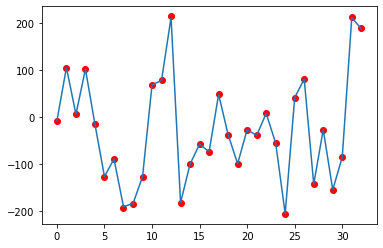

In [6]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  # mean, covariance


μ2, Σ2 = GP(X_train, y_train, X_test, exponentiated_quadratic)
ny = 5  # Number of functions that will be sampled from the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2)
plt.plot(y_test, 'ro')
plt.plot(y2)
plt.show()

In [7]:
# def fit(X, y):
#     mu = np.average(X, axis=0)

#     cov = np.cov(X, rowvar = False)

#     p = multivariate_normal(mu, cov)

#     return p

In [8]:
# fit(X_train, y_train).pdf(X_test)

In [9]:
# plt.plot(y_test/1000)
# plt.plot(fit(X_train, y_train).pdf(X_test))
# plt.show()